In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)  # Make sure everything is readable.
sns.set_style("whitegrid")

/home/ml/lpagec/anaconda2/envs/pytorch_py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ml/lpagec/anaconda2/envs/pytorch_py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
import os
print(os.getcwd())
# os.chdir('../../csv/oracle')
print(os.getcwd())
[x for x in os.listdir(os.getcwd())]

/home/ml/lpagec/pytorch/OnExposureBias/csv/oracle
/home/ml/lpagec/pytorch/OnExposureBias/csv/oracle


['gan_beta_cvot_test.csv',
 'gan_cvo_test.csv',
 'leakgan_test.csv',
 'mle_cvt_test.csv',
 'gan_mle_test.csv',
 'mle_cvo_oracle.csv',
 '.DS_Store',
 'mle_cvot_oracle.csv',
 'cot_test.csv',
 'gan_mle_oracle.csv',
 'leakgan_oracle.csv',
 'mle_cvot_test.csv',
 'gan_cvot_oracle.csv',
 'gan_beta_cvo_test.csv',
 'seqgan_test.csv',
 'cot_oracle.csv',
 'gan_beta_cvot_oracle.csv',
 'mle_cvo_test.csv',
 'seqgan_oracle.csv',
 'gan_cvo_oracle.csv',
 'gan_cvot_test.csv',
 'mle_cvt_oracle.csv',
 'nll_test.csv',
 'out.csv',
 'gan_beta_cvo_oracle.csv']

In [5]:
process = lambda path : pd.read_csv(path).drop_duplicates('Step')

gan_beta_cvo_oracle = process('gan_beta_cvo_oracle.csv')
gan_beta_cvo_test   = process('gan_beta_cvo_test.csv')

gan_beta_cvot_oracle = process('gan_beta_cvot_oracle.csv')
gan_beta_cvot_test   = process('gan_beta_cvot_test.csv')

gan_cvo_oracle = process('gan_cvo_oracle.csv')
gan_cvo_test   = process('gan_cvo_test.csv')

gan_cvot_oracle = process('gan_cvot_oracle.csv')
gan_cvot_test   = process('gan_cvot_test.csv')

gan_mle_oracle = process('gan_mle_oracle.csv')
gan_mle_test   = process('gan_mle_test.csv')

mle_cvo_oracle = process('mle_cvo_oracle.csv')
mle_cvo_test   = process('mle_cvo_test.csv')

mle_cvot_oracle = process('mle_cvot_oracle.csv')
mle_cvot_test   = process('mle_cvot_test.csv')

mle_cvt_oracle = process('mle_cvt_oracle.csv')
mle_cvt_test   = process('mle_cvt_test.csv')

cot_oracle = process('cot_oracle.csv')
cot_test = process('cot_test.csv')

leakgan_oracle = process('leakgan_oracle.csv')
leakgan_test = process('leakgan_test.csv')

seqgan_oracle = process('seqgan_oracle.csv')
seqgan_test = process('seqgan_test.csv')

nll_test       = process('nll_test.csv')

In [32]:
xx = get_size(cot_oracle)
get_ec('g', cot_oracle)
cot_oracle.Step == 101

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
Name: Step, Length: 67, dtype: bool

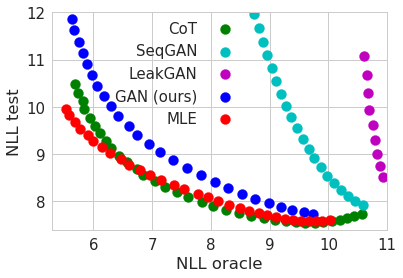

In [54]:
def get_size(pd_):
    size = [50] * len(pd_.Value)
    try:
        size[pd_[pd_.Step == 100].index[0]] = 200
    except:
        size[pd_[pd_.Step == 101].index[0]] = 200
    return size

def get_ec(c, pd_):
    ec  = [c] * len(pd_.Value)
    try:
        ec[pd_[pd_.Step == 100].index[0]] = 'k'
    except:
        ec[pd_[pd_.Step == 101].index[0]] = 'k'
    return ec

plt.scatter(cot_oracle.Value[::2], \
            cot_test.Value[::2], \
            c='g',
            label='CoT', 
            s=100)
            #s=get_size(cot_oracle)[1::2], 
            #edgecolors=get_ec('g', cot_oracle)[1::2], linewidth=3)

plt.scatter(seqgan_oracle.Value[::2], \
            seqgan_test.Value[::2], \
            c='c',
            label='SeqGAN',
            s=100)
            #s=get_size(seqgan_oracle)[1::2], 
            #edgecolors=get_ec('c', seqgan_oracle)[1::2], linewidth=3)

plt.scatter(leakgan_oracle.Value[::2], \
            leakgan_test.Value[::2], \
            c='m',
            label='LeakGAN',
            s=100)
            #s=get_size(leakgan_oracle)[1::2], 
            #edgecolors=get_ec('m', leakgan_test)[1::2], linewidth=3)

plt.scatter(gan_cvot_oracle.Value[::2], \
            gan_cvot_test.Value[::2], \
            c='b',
            label='GAN (ours)',
            s=100)
            #s=get_size(gan_cvot_oracle)[::2],
            #edgecolors=get_ec('b', gan_cvot_oracle)[::2], linewidth=3)


plt.scatter(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE',
            s=100)
            #s=get_size(mle_cvt_oracle)[::2],
            #edgecolors=get_ec('r', mle_cvt_oracle)[::2], linewidth=3)

# plt.scatter([8.19], [8.03], c='g', label='CoT')


plt.ylim(7.4, 12)
plt.xlim(5.3, 11)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False, loc=(0.17, 0.45))
plt.savefig('synthetic_no_reg_.pdf', bbox_inches='tight')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'figs/synthetic_MTI1.png'

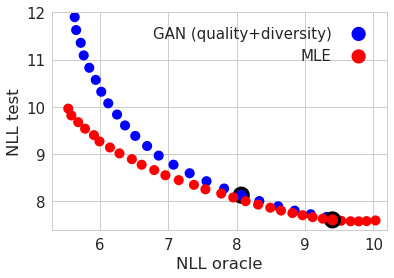

In [10]:

plt.scatter(gan_mle_oracle.Value[::2], \
            gan_mle_test.Value[::2], \
            c='b',
            label='GAN (quality+diversity)', 
            s=get_size(gan_mle_oracle)[::2], 
           edgecolors=get_ec('b', gan_mle_oracle)[::2], linewidth=3)


plt.scatter(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE', 
            s=get_size(mle_cvt_oracle)[::2], 
            edgecolors=get_ec('r', mle_cvt_oracle)[::2], linewidth=3)

plt.ylim(7.4, 12)
plt.xlim(5.3, 10.2)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False)
plt.savefig('figs/synthetic_MTI1.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.scatter(gan_beta_cvot_oracle.Value[::2], \
            gan_beta_cvot_test.Value[::2], \
            c='b',
            label='GAN (quality+diversity)', 
            s=get_size(gan_beta_cvot_oracle)[::2], 
            edgecolors=get_ec('b', gan_beta_cvot_oracle)[::2], linewidth=3)

#plt.scatter(gan_beta_cvo_oracle.Value, \
#            gan_beta_cvo_test.Value, \
#            c='g',
#            label='GAN (quality)')


plt.scatter(mle_cvt_oracle.Value[::2], \
            mle_cvt_test.Value[::2], \
            c='r',
            label='MLE', 
            s=get_size(mle_cvt_oracle)[::2], 
            edgecolors=get_ec('r', mle_cvt_oracle)[::2], linewidth=3)

plt.ylim(7.4, 12)
plt.xlim(5.3, 10.2)


# plt.colorbar(sc)
plt.xlabel('NLL oracle')
plt.ylabel('NLL test')
# plt.axis([0, 0.6, 0, 1.1])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(frameon=False, markerfirst=False)
plt.savefig('figs/synthetic_beta.png', bbox_inches='tight')
plt.show()

 ENTROPY SECTION 

In [ ]:
import os
entropy_path = os.path.join(os.getcwd(), 'csv/entropy')
entropies = {}
for file in os.listdir(entropy_path):
    # get epochs : 
    epoch = int(file.split('entropy_')[-1].split('_')[0])
    if epoch > 80 : 
        epoch -= 40 # because of discriminator pretraining
        
    pd_ = process(os.path.join(entropy_path, file))
    entropies[epoch] = pd_
    

    

In [ ]:
# once data is loaded, sort and reformat
max_epoch = max(entropies.keys())
max_t     = len(entropies[1])


In [ ]:
ent_array = np.zeros((max_epoch // 2, max_t))
for i in range(1,max_epoch, 2):
    ent = entropies[i]
    ent_array[i // 2] = np.array(ent.Value) 

In [ ]:
nll_test_array = np.zeros(((nll_test.Step.shape[0]) - 20, ))
print(nll_test_array.shape)
for i in range(nll_test.Step.shape[0]):
    # if i > 150 : break
    
    if not (i > 19 and i < 40):
        ind = i if i < 19 else i - 20
        nll_test_array[ind] = nll_test.Value[i]
    
        
for i in range(nll_test_array.shape[0]):
    print(nll_test_array[i])

In [ ]:
nll_test_array


In [ ]:
plt.scatter(np.arange(ent_array.shape[0]) * 2, ent_array[:, :20].mean(axis=1), )
plt.xlabel('epochs')
plt.ylabel('entropy')
plt.plot([40, 40], [3, 5], 'r--', lw=2)
# plt.ylim(3, 4.5)
# plt.show()
plt.savefig('figs/entropy.png')


In [ ]:
plt.scatter(np.arange(1,nll_test_array.shape[0]) * 2 , nll_test_array[1:], c='g')
plt.xlabel('epochs')
plt.ylabel('Test NLL')
plt.plot([40, 40], [2, 3], 'r--', lw=2)
plt.ylim(2, 2.5)
plt.xlim(-0.2, 275)
plt.show()
plt.savefig('figs/entropy_nll_test.png')

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2))

ax1.scatter(np.arange(ent_array.shape[0]) * 2, ent_array[:, :20].mean(axis=1), )
# ax1.set_xlabel('epochs')
ax1.set_ylabel('entropy')
ax1.plot([40, 40], [3, 5], 'r--', lw=2)
ax1.set_ylim(3, 5)
ax1.set_xlim(-0.2, 100)
ax1.set_yticklabels([3.000, 4.000, 5.000])
ax1.set_xlabel('epochs')


#plt.show()
# ax1.savefig('figs/entropy.png')

from matplotlib.ticker import FormatStrFormatter
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax2.scatter(np.arange(1,nll_test_array.shape[0]) * 2 , nll_test_array[1:], c='g')
ax2.set_ylabel('test NLL')
ax2.plot([40, 40], [2, 3], 'r--', lw=2)
ax2.set_ylim(2, 2.5)
ax2.set_xlim(-0.2, 100)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_coords(1.4,0.5)
ax2.set_xlabel('epochs')

# ax2.xaxis.set_label_coords(-.0001, -.1)
'''
ax2.set_xlim(-0.2, 275)
'''
plt.tight_layout()
plt.savefig('figs/ent_nll_tradeoff_.png')


##### 